<a href="https://colab.research.google.com/github/AnkithMall/vectra_assignment/blob/main/vectra_assignement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Assignment 1a

#### Load the Data


In [ ]:
!pip install --upgrade gspread PyDrive

import pandas as pd
import numpy as np
from google.auth import default
import matplotlib.pyplot as plt
import gspread
from google.colab import auth, drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import os

url = "https://docs.google.com/spreadsheets/d/1j-vYtQdHlhXcUjzWjHIunFlxaMexMWub0iedsFZ0QNQ/gviz/tq?tqx=out:csv&sheet=student_detail"

df = pd.read_csv(url)

In [ ]:
df

,StudentID,Name,Math,Physics,Chemistry,Biology
0,101,Alice,95,89,92,88
1,102,Bob,72,65,70,60
2,103,Charlie,88,91,85,90
3,104,David,55,62,58,61
4,105,Emma,80,77,79,83
5,106,Frank,99,95,97,96
6,107,Grace,68,72,74,70


#### Computing Total, Avg and Grades of each Students

In [ ]:
df["Avg_Score"] = np.mean(df[["Math", "Physics", "Chemistry","Biology"]], axis=1)
df["Total_Score"] = np.sum(df[["Math", "Physics", "Chemistry","Biology"]], axis=1)
df["Grade"] = np.where(df["Avg_Score"] >= 90, "A", np.where((df["Avg_Score"] >= 75) & (df["Avg_Score"] < 90), "B", np.where((df["Avg_Score"] >= 60) & (df["Avg_Score"] < 75), "C", "F")))
df

,StudentID,Name,Math,Physics,Chemistry,Biology,Avg_Score,Total_Score,Grade
0,101,Alice,95,89,92,88,91.00,364,A
1,102,Bob,72,65,70,60,66.75,267,C
2,103,Charlie,88,91,85,90,88.50,354,B
3,104,David,55,62,58,61,59.00,236,F
4,105,Emma,80,77,79,83,79.75,319,B
5,106,Frank,99,95,97,96,96.75,387,A
6,107,Grace,68,72,74,70,71.00,284,C


#### Get top 3 students in each subject

In [ ]:
#top_student = df["Total_Score"].nlargest(3)
top_student = df.sort_values(by="Total_Score", ascending=False).head(3)
top_student

,StudentID,Name,Math,Physics,Chemistry,Biology,Avg_Score,Total_Score,Grade
5,106,Frank,99,95,97,96,96.75,387,A
0,101,Alice,95,89,92,88,91.00,364,A
2,103,Charlie,88,91,85,90,88.50,354,B


**Top 3 Students For Math**

In [ ]:
top_student_Math = df.sort_values(by="Math", ascending=False).head(3)
top_student_Math

,StudentID,Name,Math,Physics,Chemistry,Biology,Avg_Score,Total_Score,Grade
5,106,Frank,99,95,97,96,96.75,387,A
0,101,Alice,95,89,92,88,91.00,364,A
2,103,Charlie,88,91,85,90,88.50,354,B


**Top 3 Students For Physics**

In [ ]:
top_student_physics = df.sort_values(by="Physics", ascending=False).head(3)
top_student_physics

,StudentID,Name,Math,Physics,Chemistry,Biology,Avg_Score,Total_Score,Grade
5,106,Frank,99,95,97,96,96.75,387,A
2,103,Charlie,88,91,85,90,88.50,354,B
0,101,Alice,95,89,92,88,91.00,364,A


**Top 3 Students For Chemistry**

In [ ]:
top_student_chem = df.sort_values(by="Chemistry", ascending=False).head(3)
top_student_chem

,StudentID,Name,Math,Physics,Chemistry,Biology,Avg_Score,Total_Score,Grade
5,106,Frank,99,95,97,96,96.75,387,A
0,101,Alice,95,89,92,88,91.00,364,A
2,103,Charlie,88,91,85,90,88.50,354,B


**Top 3 Students For Biology**

In [ ]:
top_student_bio = df.sort_values(by="Biology", ascending=False).head(3)
top_student_bio

,StudentID,Name,Math,Physics,Chemistry,Biology,Avg_Score,Total_Score,Grade
5,106,Frank,99,95,97,96,96.75,387,A
2,103,Charlie,88,91,85,90,88.50,354,B
0,101,Alice,95,89,92,88,91.00,364,A


#### Data Visualization

In [ ]:
avg_scores = np.array(df[["Avg_Score"]]).flatten()
student_name = np.array(df[["Name"]]).flatten()
avg_scores,student_name

(array([91.  , 66.75, 88.5 , 59.  , 79.75, 96.75, 71.  ]),
 array(['Alice', 'Bob', 'Charlie', 'David', 'Emma', 'Frank', 'Grace'],
       dtype=object))

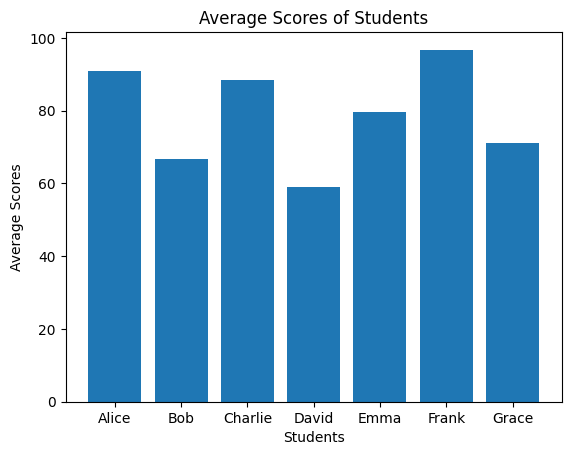

In [ ]:
plt.bar(student_name, avg_scores)
plt.title("Average Scores of Students")
plt.xlabel("Students")
plt.ylabel("Average Scores")
plot_filename="Average_Scores_of_Students.png"
plt.savefig(plot_filename)
plt.show()

#### Export Summary and Top Students in each Subject

**summary**

In [ ]:
summary = df[["StudentID","Name","Total_Score","Avg_Score","Grade"]]
summary

,StudentID,Name,Total_Score,Avg_Score,Grade
0,101,Alice,364,91.00,A
1,102,Bob,267,66.75,C
2,103,Charlie,354,88.50,B
3,104,David,236,59.00,F
4,105,Emma,319,79.75,B
5,106,Frank,387,96.75,A
6,107,Grace,284,71.00,C


**Top 3 students in each subject combined dataframe**

In [ ]:
top_student_Math["Topped_Subject"] = ["Math"]*3
top_student_physics["Topped_Subject"] = ["Physics"]*3
top_student_chem["Topped_Subject"] = ["Chemistry"]*3
top_student_bio["Topped_Subject"] = ["Biology"]*3

"""
top_student_Math = top_student_Math[["StudentID","Name","Total_Score","Avg_Score","Grade","Topped_Subject","Math"]]
top_student_physics = top_student_physics[["StudentID","Name","Total_Score","Avg_Score","Grade","Topped_Subject","Physics"]]
top_student_chem = top_student_chem[["StudentID","Name","Total_Score","Avg_Score","Grade","Topped_Subject","Chemistry"]]
top_student_bio = top_student_bio[["StudentID","Name","Total_Score","Avg_Score","Grade","Topped_Subject","Biology"]]
"""
top_students = pd.concat([top_student_Math, top_student_physics, top_student_chem, top_student_bio])
top_students

,StudentID,Name,Math,Physics,Chemistry,Biology,Avg_Score,Total_Score,Grade,Topped_Subject
5,106,Frank,99,95,97,96,96.75,387,A,Math
0,101,Alice,95,89,92,88,91.00,364,A,Math
2,103,Charlie,88,91,85,90,88.50,354,B,Math
5,106,Frank,99,95,97,96,96.75,387,A,Physics
2,103,Charlie,88,91,85,90,88.50,354,B,Physics
0,101,Alice,95,89,92,88,91.00,364,A,Physics
5,106,Frank,99,95,97,96,96.75,387,A,Chemistry
0,101,Alice,95,89,92,88,91.00,364,A,Chemistry
2,103,Charlie,88,91,85,90,88.50,354,B,Chemistry
5,106,Frank,99,95,97,96,96.75,387,A,Biology


**Authenticat Google Sheet**

In [ ]:
auth.authenticate_user()
# 2️⃣ Get credentials
creds, _ = default()  # returns google.auth.credentials.Credentials

# 3️⃣ Authorize gspread with credentials
gc = gspread.authorize(creds)
sh = gc.open_by_url(url)
print([ws.title for ws in sh.worksheets()])

['student_detail', 'Summary', 'Top_Students']


**Create worksheet if not created**

In [ ]:
sh.add_worksheet(title="Summary", rows="100", cols="20") if "Summary" not in [ws.title for ws in sh.worksheets()] else None
sh.add_worksheet(title="Top_Students", rows="100", cols="20") if "Top_Students" not in [ws.title for ws in sh.worksheets()] else None

**get the worksheets**

In [ ]:
ws_summary = sh.worksheet("Summary")
ws_top_students = sh.worksheet("Top_Students")

**clear the worksheet and add the dataframes**

In [ ]:
ws_summary.clear()
ws_top_students.clear()

ws_summary.append_rows( [summary.columns.tolist()] + summary.values.tolist())
ws_top_students.append_rows( [top_students.columns.tolist()] + top_students.values.tolist())

{'spreadsheetId': '1j-vYtQdHlhXcUjzWjHIunFlxaMexMWub0iedsFZ0QNQ',
 'updates': {'spreadsheetId': '1j-vYtQdHlhXcUjzWjHIunFlxaMexMWub0iedsFZ0QNQ',
  'updatedRange': 'Top_Students!A1:J13',
  'updatedRows': 13,
  'updatedColumns': 10,
  'updatedCells': 130}}

#### Insert Bar Chart into the Sheet

In [ ]:
gauth = GoogleAuth()
gauth.credentials = creds
drive_client = GoogleDrive(gauth)

In [ ]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from googleapiclient.discovery import build
from googleapiclient.http import MediaFileUpload
drive_service = build('drive', 'v3', credentials=creds)
file_metadata = {'name': plot_filename, 'mimeType': 'image/png'}
media = MediaFileUpload(plot_filename, mimetype='image/png')
uploaded_file = drive_service.files().create(
    body=file_metadata,
    media_body=media,
    fields='id, webContentLink'
).execute()

In [ ]:
file_id = uploaded_file.get('id')
uploaded_file

{'id': '1tpxMm4LwSsns5AbXPtWFdl8J-8ND_c3Y',
 'webContentLink': 'https://drive.google.com/uc?id=1tpxMm4LwSsns5AbXPtWFdl8J-8ND_c3Y&export=download'}

In [ ]:
image_url = f"https://drive.google.com/uc?id={file_id}"
image_url

'https://drive.google.com/uc?id=1tpxMm4LwSsns5AbXPtWFdl8J-8ND_c3Y'

In [149]:
ws_summary.update_acell("H1",image_url)
ws_summary.update_acell("H2",f'=IMAGE("{image_url}")')

{'spreadsheetId': '1j-vYtQdHlhXcUjzWjHIunFlxaMexMWub0iedsFZ0QNQ',
 'updatedRange': 'Summary!H2',
 'updatedRows': 1,
 'updatedColumns': 1,
 'updatedCells': 1}

# Assignment 1b

In [150]:
from shapely.geometry import Point, LineString, Polygon


In [151]:
p1 = Point(1, 2)
p2 = Point(2, 3)

print(p1.x, p1.y)  # access coordinates
print(p1.distance(p2))  # distance between points


1.0 2.0
1.4142135623730951


Polygon Area (shoelace formula): 46.3
Polygon Area (using shaply lib) : 46.3
Edge Vectors : [array([ 3.45, -4.76]), array([-2.5, -3. ]), array([-5.,  0.]), array([-2.5,  3. ]), array([6.55, 4.76])] 
Edge Length : [np.float64(5.878783887846192), np.float64(3.905124837953327), np.float64(5.0), np.float64(3.905124837953327), np.float64(8.096919167189457)] 
Interior Angles : [np.float64(104.26020765837359), np.float64(129.8055710922652), np.float64(129.8055710922652), np.float64(86.20099205875376), np.float64(89.92765809834229)]
Is Convex : True
Centroid (Calculated vertices avg) : (7.81,2.752)
Centroid (Shapely) : [[7.76558675 3.16766019]]


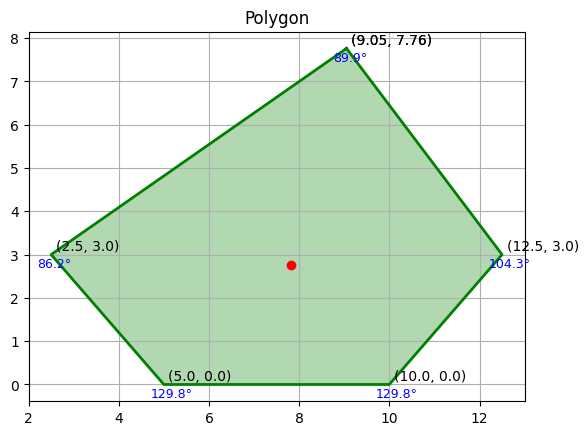

In [199]:
poly = Polygon([(9.05, 7.76),(12.5, 3.0),(10.0, 0.0),(5.0, 0.0),(2.5, 3.0)])

#calculate area using shoelace formula

vertices = poly.exterior.coords
area = 0.0
n = len(vertices)
for i in range(n):
    #area += np.cross(vertices[i], vertices[(i+1)% n])
    area += (vertices[i][0] * vertices[(i+1) % n][1] - vertices[(i+1) % n][0] * vertices[i][1])
area = abs(area) / 2.0
print(f"Polygon Area (shoelace formula): {area}")
print("Polygon Area (using shaply lib) :", poly.area)
#both produced area spanning 46.3Units
#print("Polygon perimeter:", poly.length)

# calculate edge vectors and their magnitude's
edge_vectors = []
edge_magnitudes = []
for i in range(len(poly.exterior.coords)-1):
    edge_vector = np.array(poly.exterior.coords[i+1]) - np.array(poly.exterior.coords[i])
    edge_vectors.append(edge_vector)
    edge_magnitudes.append(np.linalg.norm(edge_vector))

print(f"Edge Vectors : {edge_vectors} ")
print(f"Edge Length : {edge_magnitudes} ")

# calculate interior angle and check if the polygon is convex


angles = []
isconvex = True
for i in range(len(edge_vectors)):
    angle = np.degrees(np.arccos(np.dot(edge_vectors[i], -edge_vectors[(i+1) % len(edge_vectors)]) / (edge_magnitudes[i] * edge_magnitudes[(i+1) % len(edge_vectors)])))

    #cross = np.cross(-edge_vectors[i],edge_vectors[(i+1) % len(edge_vectors)])
    v1 = -edge_vectors[i]
    v2 = edge_vectors[(i+1) % len(edge_vectors)]
    cross = v1[0] * v2[1] - v1[1] * v2[0]
    if cross < 0:
        angle = 360 - angle

    angles.append((vertices[(i+1) % len(vertices)],angle))
    if angle > 180:
        isconvex = False
angle_values = [angle for vertex, angle in angles]
print(f"Interior Angles : {angle_values}")
print(f"Is Convex : {isconvex}")

# Calculating Centroid
x_centroid = sum([point[0] for point in list(poly.exterior.coords)[:-1]]) / (len(poly.exterior.coords) - 1)
y_centroid = sum([point[1] for point in list(poly.exterior.coords)[:-1]]) / (len(poly.exterior.coords) - 1)
print(f"Centroid (Calculated vertices avg) : ({x_centroid},{y_centroid})")
print(f"Centroid (Shapely) : {np.array(poly.centroid.coords)}")
# slightly varies with shapely centroid which calculates area weighted centroid but we are just averaging the vertices

# Plot Polygon
x, y = poly.exterior.xy
#print(f"Exterior = {poly.exterior.xy}")
plt.plot(x, y, color='green', linewidth=2)
plt.fill(x, y, alpha=0.3, color='green')
#mark centroid
plt.scatter(x_centroid, y_centroid, color="red", zorder=5)
#co-ordinates marking
for point in poly.exterior.coords:
    plt.text(point[0]+0.1, point[1]+0.1, f"{point}")

#marking interior angles
for (p, ang) in angles:
    plt.text(p[0]-0.3, p[1]-0.3, f"{ang:.1f}°", fontsize=9, color="blue")

plt.title("Polygon")
plt.grid(True)

plt.show()

# Assignment 2

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from collections import defaultdict

def get_spiral_positions(width, height):
    # Generate positions in spiral order from center outward
    # the placement of tiles will be based on these positions
    center_x = width / 2
    center_y = height / 2
    positions = []

    for x in range(width):
        for y in range(height):
            dist = ((x + 0.5 - center_x) ** 2 + (y + 0.5 - center_y) ** 2) ** 0.5
            positions.append((dist, x, y))

    positions.sort()  # Sort by distance from center
    return [(x, y) for _, x, y in positions], center_x, center_y

def can_place_tile(grid, x, y, size):
    # Check if a tile of given size can be placed at position (x, y)
    height, width = grid.shape
    if x + size > width or y + size > height:
        return False

    for i in range(x, x + size):
        for j in range(y, y + size):
            if grid[j, i] != 0:
                return False
    return True

def place_tile(grid, x, y, size, tile_id):
    # Place a tile on the grid (assign title id in room grid)
    for i in range(x, x + size):
        for j in range(y, y + size):
            grid[j, i] = tile_id

def tile_room_spiral(width, height):
    # Logic to tile the room in spiral pattern
    grid = np.zeros((height, width), dtype=int) #initialize room grid
    #tile summary
    tile_info = {}
    tile_counts = defaultdict(int)
    tile_colors = {1: 'red', 2: 'blue', 3: 'yellow', 4: 'green'}
    tile_id = 1

    spiral_positions, center_x, center_y = get_spiral_positions(width, height)

    # step-1 : placing larger tiles (4x4, 3x3, 2x2) in spiral order
    for size in [4, 3, 2]:
        placed_count = 0
        for x, y in spiral_positions:
            if can_place_tile(grid, x, y, size):
                place_tile(grid, x, y, size, tile_id)
                tile_info[tile_id] = (size, x, y)
                tile_counts[size] += 1
                tile_id += 1
                placed_count += 1

                # Limit tiles per size for better distribution
                if size == 4 and placed_count >= (width * height) // 20:
                    break
                elif size == 3 and placed_count >= (width * height) // 15:
                    break

    # step-2 : filling the remaining spaces with 2x2 tiles if possible
    empty_cells = [(x, y) for y in range(height) for x in range(width) if grid[y, x] == 0]
    for x, y in empty_cells:
        if can_place_tile(grid, x, y, 2):
            place_tile(grid, x, y, 2, tile_id)
            tile_info[tile_id] = (2, x, y)
            tile_counts[2] += 1
            tile_id += 1

    # step-3 : filling remaining spaces with 1x1 tiles (especially center if needed)
    for x, y in spiral_positions:
        if grid[y, x] == 0:
            place_tile(grid, x, y, 1, tile_id)
            tile_info[tile_id] = (1, x, y)
            tile_counts[1] += 1
            tile_id += 1

    return grid, tile_info, tile_counts, tile_colors, center_x, center_y

def visualize_tiling(grid, tile_info, tile_counts, tile_colors, center_x, center_y, width, height):

    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 7))

    # Left plot: Room visualization
    ax1.set_xlim(0, width)
    ax1.set_ylim(0, height)
    ax1.set_aspect('equal')
    ax1.set_title(f'Spiral Pattern Room Tiling ({width}×{height})')

    # spiral center marker
    #ax1.plot(center_x, center_y, 'k*', markersize=15, label='Center', zorder=10)

    # spiral path
    """theta = np.linspace(0, 4*np.pi, 100)
    r = np.linspace(0, min(width, height)/2, 100)
    x_spiral = center_x + r * np.cos(theta)
    y_spiral = center_y + r * np.sin(theta)
    ax1.plot(x_spiral, y_spiral, 'gray', alpha=0.2, linewidth=1, linestyle='--')
    """

    # Draw tiles
    for tile_id, (tile_size, x, y) in tile_info.items():
        color = tile_colors[tile_size]
        rect = patches.Rectangle((x, y), tile_size, tile_size,
                               linewidth=2, edgecolor='black',
                               facecolor=color, alpha=0.7)
        ax1.add_patch(rect)

        # Add size label
        center_tile_x = x + tile_size / 2
        center_tile_y = y + tile_size / 2
        fontsize = max(6, 12 - tile_size)
        ax1.text(center_tile_x, center_tile_y, f'{tile_size}×{tile_size}',
                ha='center', va='center', fontweight='bold',
                fontsize=fontsize, color='white')

    ax1.set_xticks(range(width + 1))
    ax1.set_yticks(range(height + 1))
    ax1.grid(True, alpha=0.3)
    ax1.set_xlabel('Width (X)')
    ax1.set_ylabel('Height (Y)')
    ax1.legend(loc='upper right')

    # Right plot: Tile count summary
    sizes = sorted(tile_counts.keys(), reverse=True)
    counts = [tile_counts[size] for size in sizes]
    colors = [tile_colors[size] for size in sizes]

    bars = ax2.bar([f'{size}×{size}' for size in sizes], counts,
                  color=colors, alpha=0.8, edgecolor='black', linewidth=2)

    # Add count labels on bars
    for bar, count in zip(bars, counts):
        if count > 0:
            ax2.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
                    str(count), ha='center', va='bottom',
                    fontweight='bold', fontsize=12)

    ax2.set_title('Tile Count Summary', fontsize=14, fontweight='bold')
    ax2.set_xlabel('Tile Size', fontsize=12)
    ax2.set_ylabel('Number of Tiles', fontsize=12)
    ax2.grid(axis='y', alpha=0.3)

    # Add summary statistics
    total_tiles = sum(counts)

    info_text = (f'Total Tiles: {total_tiles}\n')

    ax2.text(0.02, 0.98, info_text, transform=ax2.transAxes,
            verticalalignment='top', fontsize=11,
            bbox=dict(boxstyle='round', facecolor='lightblue', alpha=0.9))

    plt.suptitle('Room Tiling with Spiral Pattern (Greedy Strategy)',
                fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()

def print_summary(tile_counts, width, height):

    print(f"\n{'='*60}")
    print(f"ROOM TILING SUMMARY ({width}×{height})")
    print(f"{'='*60}")

    print(f"\nTile Distribution:")
    print(f"{'Size':<15} {'Count':<10} {'Color':<10}")
    print(f"{'-'*50}")

    tile_color_names = {1: 'Red', 2: 'Blue', 3: 'Yellow', 4: 'Green'}
    for size in sorted(tile_counts.keys(), reverse=True):
        count = tile_counts[size]
        area_used = size * size * count
        color = tile_color_names[size]
        print(f"{size}×{size:<14} {count:<10} {color:<10}")

    print(f"{'-'*50}")
    total_tiles = sum(tile_counts.values())
    print(f"Total Tiles: {total_tiles}")




Enter room width (default 12): 
Enter room height (default 10): 

Processing room: 12×10


ROOM TILING SUMMARY (12×10)

Tile Distribution:
Size            Count      Color     
--------------------------------------------------
4×4              4          Green     
3×3              3          Yellow    
2×2              4          Blue      
1×1              13         Red       
--------------------------------------------------
Total Tiles: 24


/tmp/ipython-input-3695272022.py:128: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax1.legend(loc='upper right')


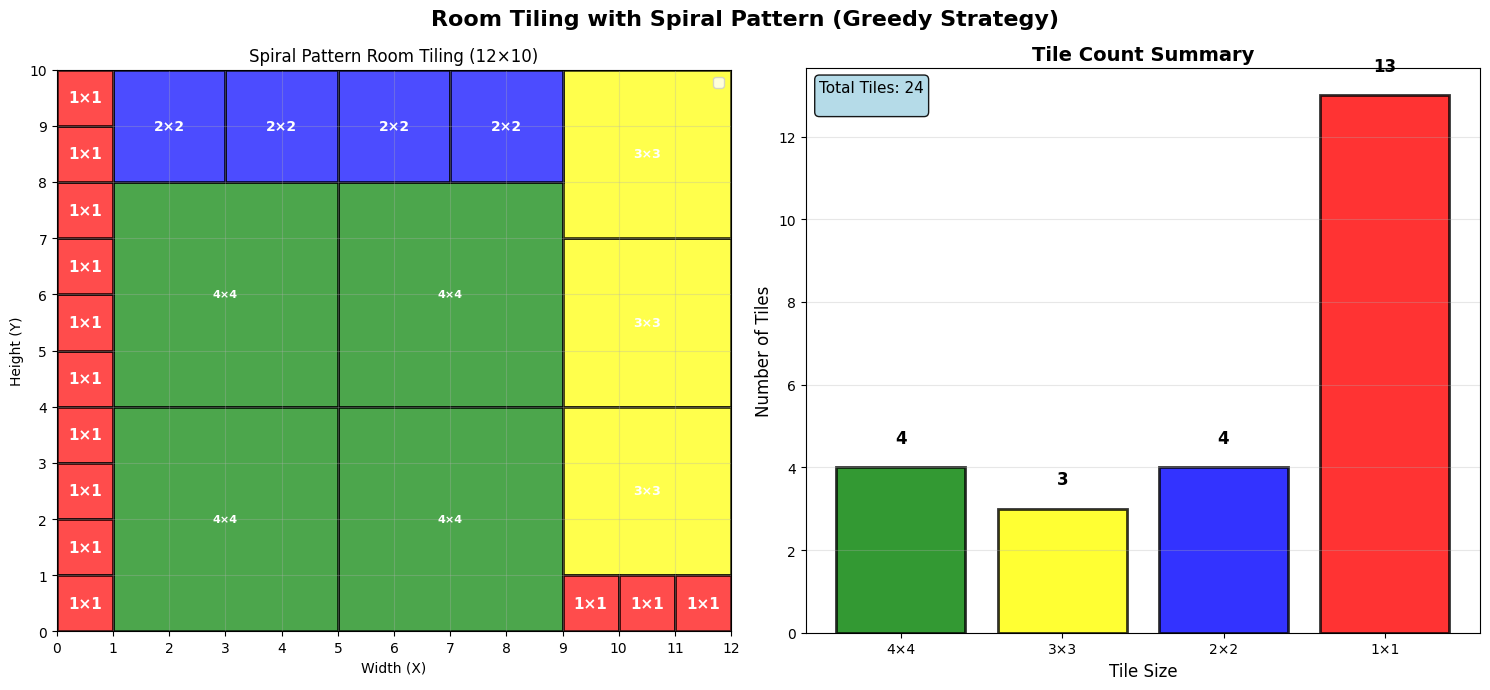

In [18]:
def main():

    print("="*60)

    # Get width and height of the room from user input
    try:
        width = int(input("\nEnter room width (default 12): ") or "12")
        height = int(input("Enter room height (default 10): ") or "10")
    except ValueError:
        print("Invalid input, using default 12×10")
        width, height = 12, 10

    print(f"\nProcessing room: {width}×{height}\n")

    # Run tiling algorithm
    grid, tile_info, tile_counts, tile_colors, center_x, center_y = tile_room_spiral(width, height)

    # Show results
    print_summary(tile_counts, width, height)
    visualize_tiling(grid, tile_info, tile_counts, tile_colors, center_x, center_y, width, height)

    return grid, tile_info, tile_counts

if __name__ == "__main__":
    main()

# Assignment 3

In [11]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import random

def place_bins_in_container(container_width, container_height, bins):

    placed_bins = {}
    unplaced_bins = []

    x_cursor = 0
    y_cursor = 0
    current_row_height = 0

    for bin_id, bin_w, bin_h in bins:
        # If bin width is larger than container width, cannot place
        if bin_w > container_width or bin_h > container_height:
            unplaced_bins.append(bin_id)
            continue

        # if bin fits in current row
        if x_cursor + bin_w <= container_width:
            # if bin fits vertically within container
            if y_cursor + bin_h <= container_height:
                # Place bin
                placed_bins[bin_id] = (x_cursor, y_cursor, bin_w, bin_h)
                # Move cursor for next bin
                x_cursor += bin_w
                # Update current row height if needed
                current_row_height = max(current_row_height, bin_h)
            else:
                # Bin height exceeds container height
                unplaced_bins.append(bin_id)
        else:
            # Move to next row
            y_cursor += current_row_height
            x_cursor = 0
            current_row_height = 0

            # Check again if bin fits after row move
            if y_cursor + bin_h <= container_height:
                placed_bins[bin_id] = (x_cursor, y_cursor, bin_w, bin_h)
                x_cursor += bin_w
                current_row_height = bin_h
            else:
                # No more vertical space
                unplaced_bins.append(bin_id)

    return placed_bins, unplaced_bins

def visualize_bin_packing(container_width, container_height, placed_bins, unplaced_bins):

    fig, ax = plt.subplots(figsize=(12, 8))

    # Draw container rectangle
    container_rect = patches.Rectangle((0, 0), container_width, container_height,
                                       linewidth=3, edgecolor='black', facecolor='lightgray', alpha=0.3)
    ax.add_patch(container_rect)

    # Generate random colors for bins
    random.seed(42)  # For reproducibility
    colors = {}
    for bin_id in placed_bins:
        colors[bin_id] = (random.random(), random.random(), random.random())

    # Draw placed bins
    for bin_id, (x, y, w, h) in placed_bins.items():
        rect = patches.Rectangle((x, y), w, h, linewidth=2, edgecolor='black',
                                 facecolor=colors[bin_id], alpha=0.8)
        ax.add_patch(rect)

        # Add bin ID label at center
        ax.text(x + w/2, y + h/2, str(bin_id), color='white', fontweight='bold',
                ha='center', va='center', fontsize=10)

    # Set plot properties
    ax.set_xlim(-1, container_width + 2)
    ax.set_ylim(-1, container_height + 2)
    ax.set_aspect('equal')
    ax.set_title(f'Bin Packing in Container ({container_width}×{container_height}) - Row-wise Placement',
                 fontsize=14, fontweight='bold')
    ax.set_xlabel('Width (X)', fontsize=12)
    ax.set_ylabel('Height (Y)', fontsize=12)
    ax.grid(True, alpha=0.3)

    # Add statistics text
    stats_text = f'Placed: {len(placed_bins)} bins\nUnplaced: {len(unplaced_bins)} bins'
    ax.text(0.02, 0.98, stats_text, transform=ax.transAxes, fontsize=10,
            verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

def print_results(placed_bins, unplaced_bins):

    print("="*60)
    print("BIN PACKING RESULTS")
    print("="*60)

    print(f"\n PLACED BINS ({len(placed_bins)}):")
    if placed_bins:
        for bin_id, (x, y, w, h) in placed_bins.items():
            print(f"  Bin {bin_id}: Position ({x}, {y}), Size ({w}×{h})")
    else:
        print("  None")

    print(f"\n UNPLACED BINS ({len(unplaced_bins)}):")
    if unplaced_bins:
        for bin_id in unplaced_bins:
            print(f"  Bin {bin_id}")
    else:
        print("  None")



BIN PACKING - ROW-WISE PLACEMENT
container : 15 × 10
bins to place : 12
BIN PACKING RESULTS

 PLACED BINS (9):
  Bin 101: Position (0, 0), Size (4×3)
  Bin 102: Position (4, 0), Size (5×2)
  Bin 103: Position (9, 0), Size (3×5)
  Bin 104: Position (12, 0), Size (2×2)
  Bin 105: Position (0, 5), Size (7×3)
  Bin 106: Position (7, 5), Size (3×3)
  Bin 108: Position (0, 8), Size (1×1)
  Bin 109: Position (1, 8), Size (8×2)
  Bin 112: Position (9, 8), Size (4×2)

 UNPLACED BINS (3):
  Bin 107
  Bin 110
  Bin 111


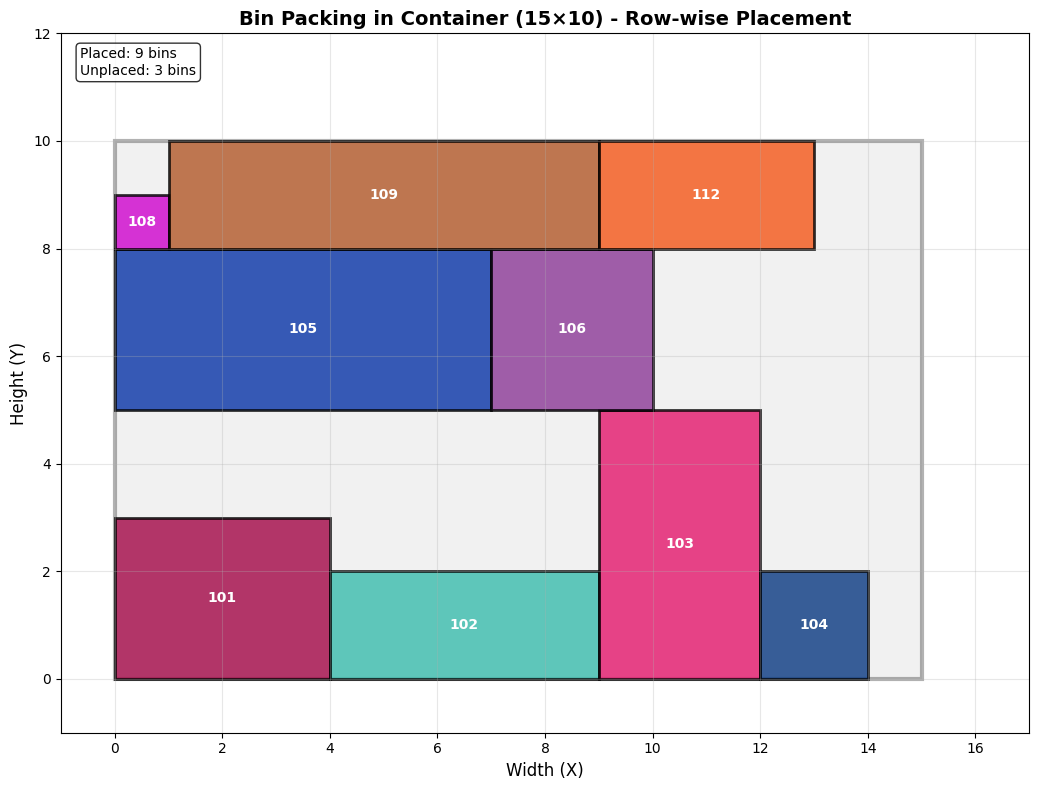

In [12]:

def main():
    print("BIN PACKING - ROW-WISE PLACEMENT")
    print("="*50)

    # Container dimensions
    container_width = 15
    container_height = 10

    # Bins with (id, width, height)
    bins = [
        (101, 4, 3),
        (102, 5, 2),
        (103, 3, 5),
        (104, 2, 2),
        (105, 7, 3),
        (106, 3, 3),
        (107, 6, 4),
        (108, 1, 1),
        (109, 8, 2),
        (110, 5, 5),
        (111, 2, 6),
        (112, 4, 2),
    ]

    print(f"container : {container_width} × {container_height}")
    print(f"bins to place : {len(bins)}")

    # Run bin packing algorithm
    placed_bins, unplaced_bins = place_bins_in_container(container_width, container_height, bins)

    # Print results
    print_results(placed_bins, unplaced_bins)

    # Visualize results
    visualize_bin_packing(container_width, container_height, placed_bins, unplaced_bins)

    return placed_bins, unplaced_bins

# using custom input
def custom_bin_packing():
    container_width = int(input("Enter container width: "))
    container_height = int(input("Enter container height: "))

    bins = []
    print("\nEnter bins (format: id width height). Type 'done' to finish:")
    while True:
        user_input = input("Bin: ").strip()
        if user_input.lower() == 'done':
            break
        try:
            parts = user_input.split()
            bin_id = int(parts[0])
            bin_width = int(parts[1])
            bin_height = int(parts[2])
            bins.append((bin_id, bin_width, bin_height))
        except (ValueError, IndexError):
            print("Invalid format. Use: id width height")

    placed_bins, unplaced_bins = place_bins_in_container(container_width, container_height, bins)
    print_results(placed_bins, unplaced_bins)
    visualize_bin_packing(container_width, container_height, placed_bins, unplaced_bins)

    return placed_bins, unplaced_bins

if __name__ == "__main__":
    main()
